<a href="https://colab.research.google.com/github/Bokocki/135UM-Homework/blob/main/Homework08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Working with Other Loss Functions**

-------------------------------

During the class today, we reconstructed an **ellipse**. The ellipse was defined with two **foci** and $C$ (the sum of distances of the ellipse points from the foci).

To reconstruct the ellipse through optimization, we began with **$N$ points** scattered randomly in the 2D plane. Our goal was to adjust their positions so that they satisfy the elliptical constraint as closely as possible. We achieved this by minimizing the **error-related loss**, $L^{(2)}_{\text{ellipse}}$ which was defined in today's class with $\ell_2$ norm as:

$$
L^{(2)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2
$$

where
$$
 \epsilon_i = d_{i1} + d_{i2} - C
$$
where $N$ is the number of points, and $d_{i1}, d_{i2}$ are their distances to the two foci.

In the homework assignment you will experiment with 3 other loss definitions based on some other possible norms.



1. $\ell_0$ norm resulting in
  $$
  L^{(0)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0)
  $$
  - If you actually succeed to code this loss function, the question for you to answer in relation to $L^{(0)}_{\text{ellipse}}$ is why the training is not progressing with passing epochs.
  - If you actually fail to code this loss function, the question for you to answer is to explain the failure and reason out theoretically, why the training would not be progressing with passing epochs, anyway.

1. $\ell_1$ norm resulting in
  $$
  L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(1)}_{\text{ellipse}}$ is why the training loss doesn't converge, even after the ellipse has been fully drawn.

1. $\ell_\infty$ norm resulting in
  $$
  L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(\infty)}_{\text{ellipse}}$ is why the training takes so long and it doesn't converge in the end, either.

## **Points to Note**

1. Draw both the shape that the points draw as they move, and the loss value after each epoch, just as we did in class today.

2. Note, that the purpose of this excercise is not that you reconstruct a perfect ellipse, but rather that you give it a try, and even if you fail you should document and explain the failure, and answer a question related to a given loss definition.

3. You can also play around with the learning rate to try to improve convergence.

## **Task & Deliverables**
  
   - Document your experiments (python code and charts) and **write down your conclusions** into the Colab notebook.
   - It is not strictly required, but **if you make a movie showing the optimization progress it will be considered a strong point of your solution**
     - You can make a movie programmatically as we did in clustering class (our second class) with EM clustering,
     - or, you can save to disk the image files with epoch charts and use an external tool to bind them into a movie. Provide links to movie files in the README.
   - Place the Colab notebook  with the solution in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook (and any movies you created) and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.

## Sample code

   You can use the sample code provided below:



# Solution to the homework exercise
---
## Setup code

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import time

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()

    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')

    plt.show()

## $\ell_0$ norm

In [2]:
# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []

# Start timing
start_time = time.time()

# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    # Compute l_0 loss
    loss = torch.mean((dist1 + dist2 - constant_sum != 0).float())

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if epoch % 10 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

#Final plot
plot_results(epoch, trajectories, loss_history)

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

The code fails at the *loss.backward()* step. That implies that PyTorch is unable to obtain non-zero gradient of the loss function. The loss function takes form
$$
L^{(0)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0),
$$
it is a linear combination of piecewise constant functions, so at each point its gradient is zero or does not exist. Because the gradient is almost everywhere 0, PyTorch is unable to make an optimization step, so it throws an error.

Even if the code worked, there would be no progress in training. Since at each epoch the gradient would be 0, there would be no way to determine the direction of the optimizing step, so the points would stay in the same place.

## $\ell_1$ norm

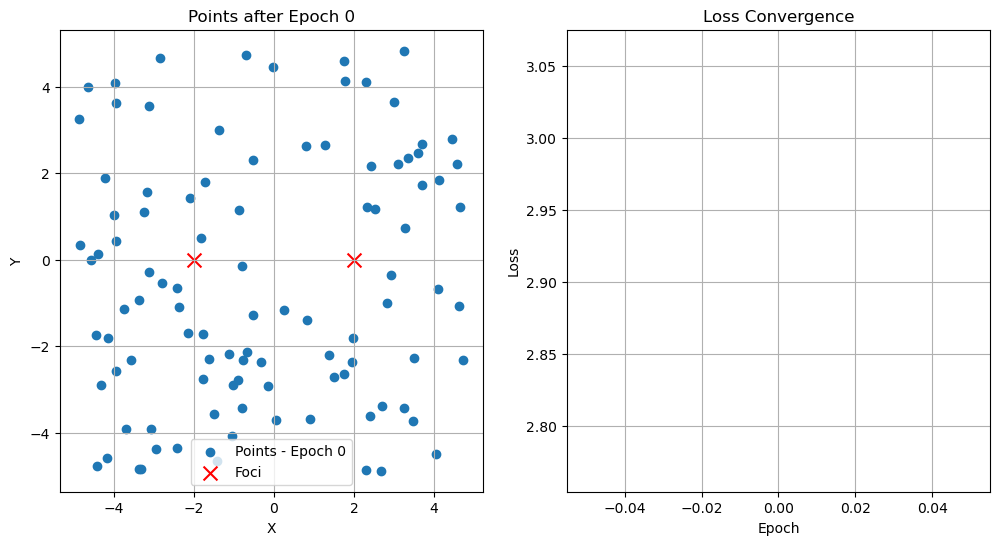

Epoch 0: Loss = 2.914691


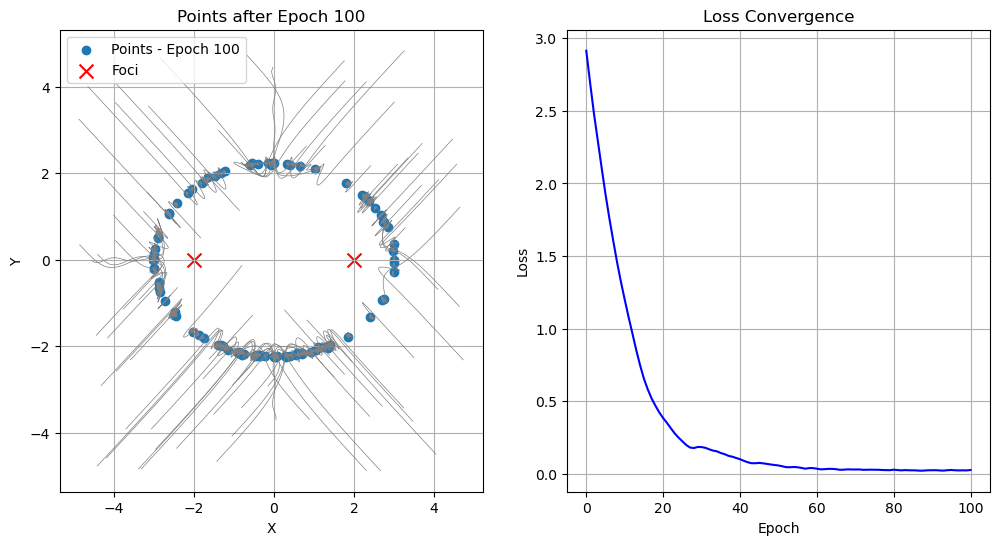

Epoch 100: Loss = 0.026074


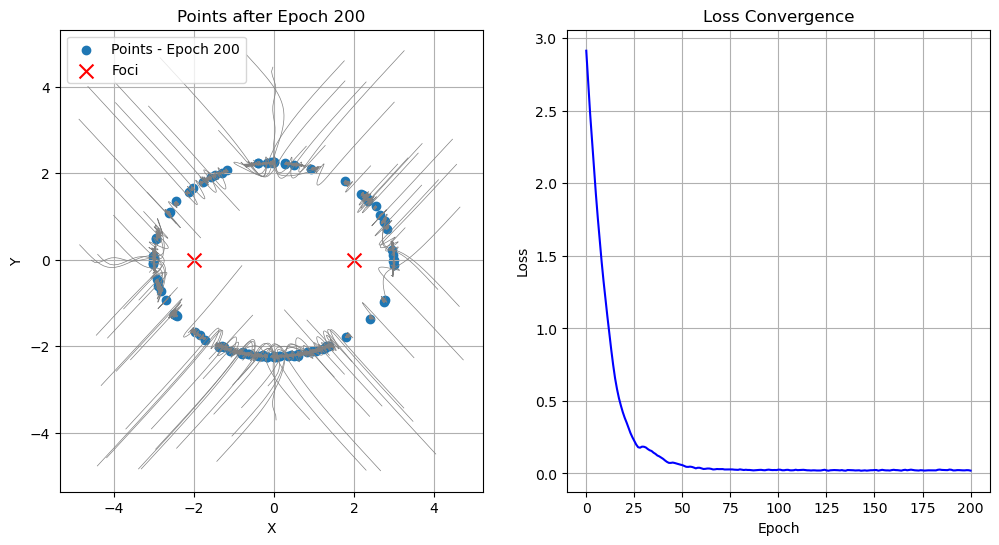

Epoch 200: Loss = 0.019360


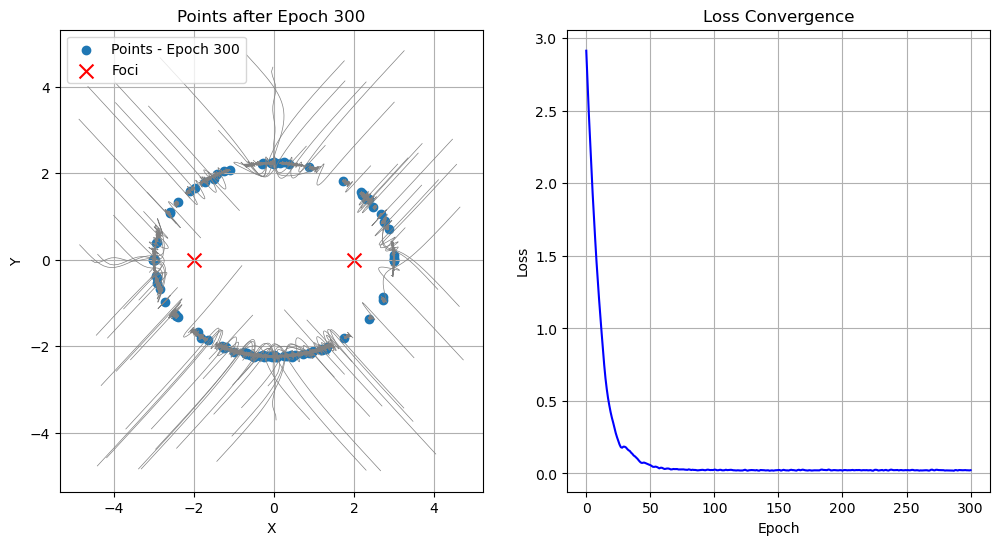

Epoch 300: Loss = 0.022251


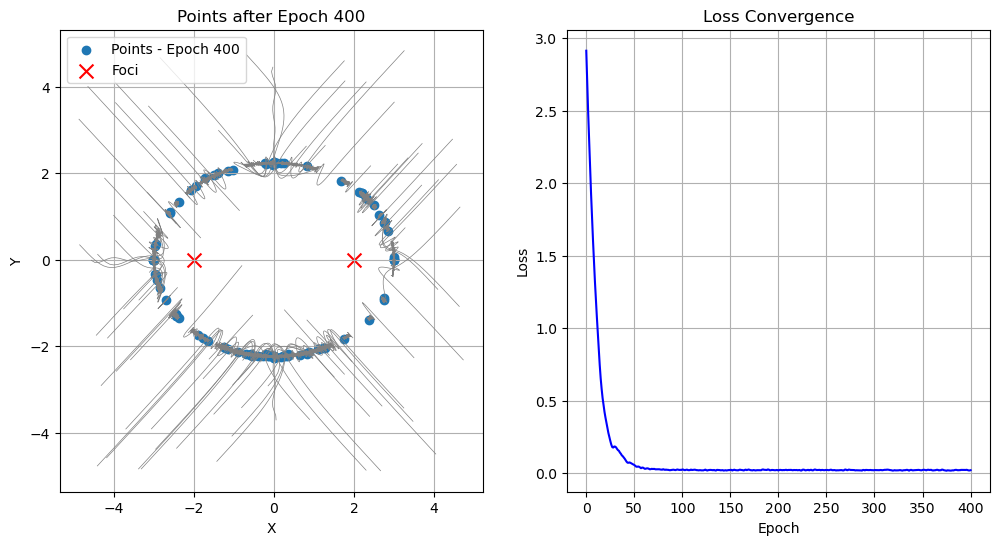

Epoch 400: Loss = 0.021247


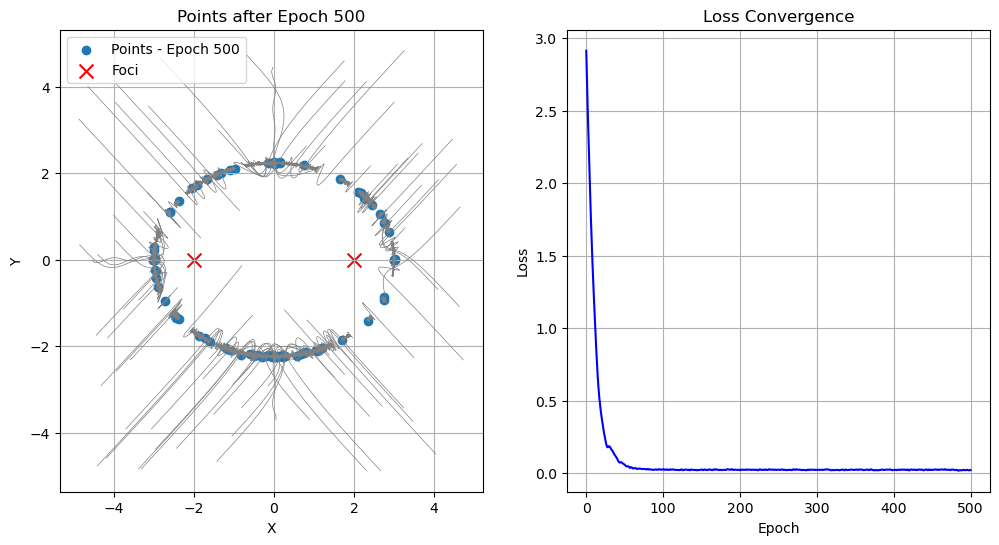

Epoch 500: Loss = 0.020481


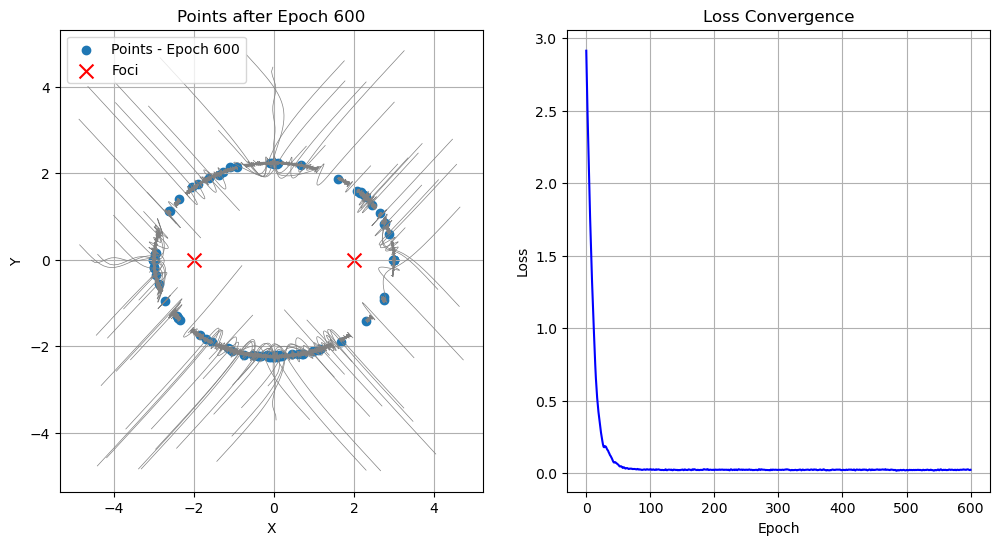

Epoch 600: Loss = 0.021953


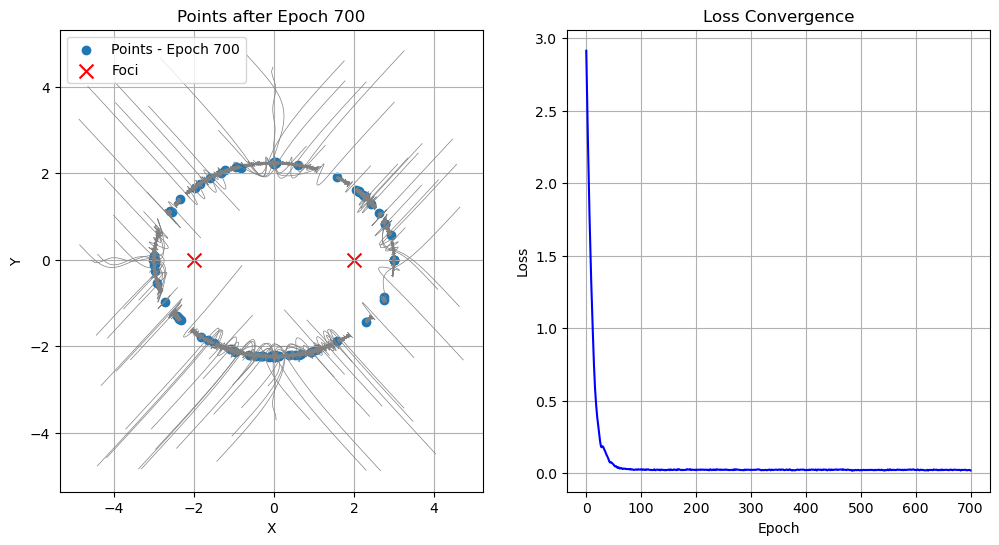

Epoch 700: Loss = 0.017712


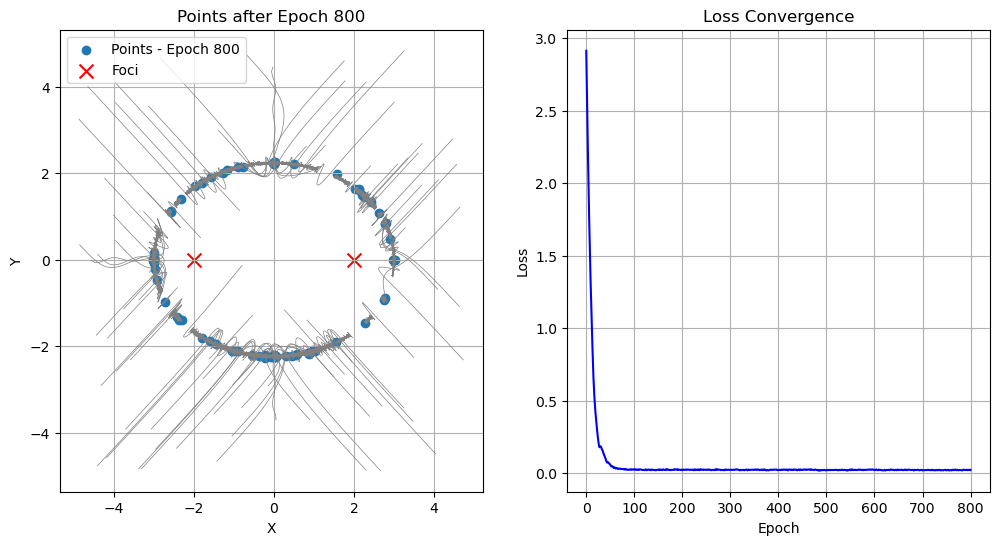

Epoch 800: Loss = 0.021285


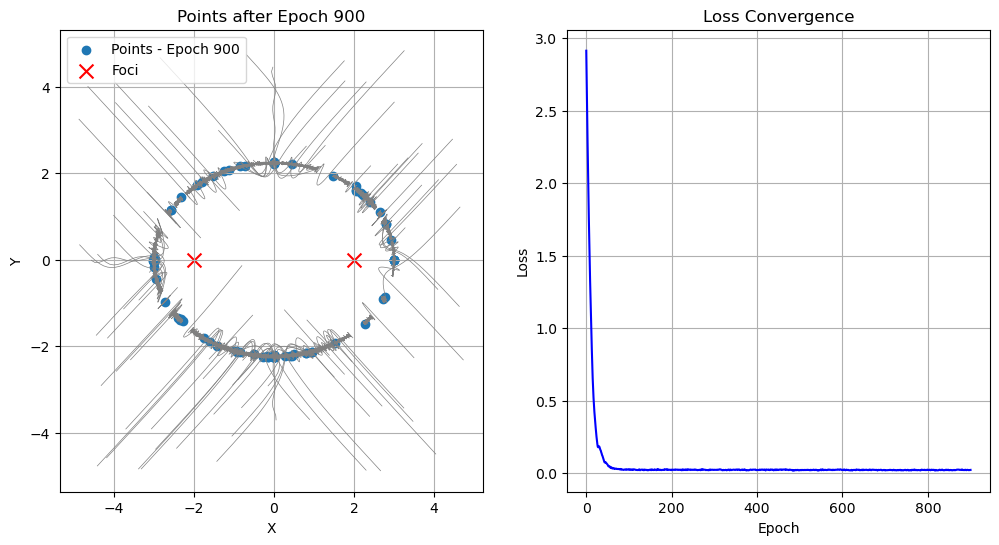

Epoch 900: Loss = 0.021231


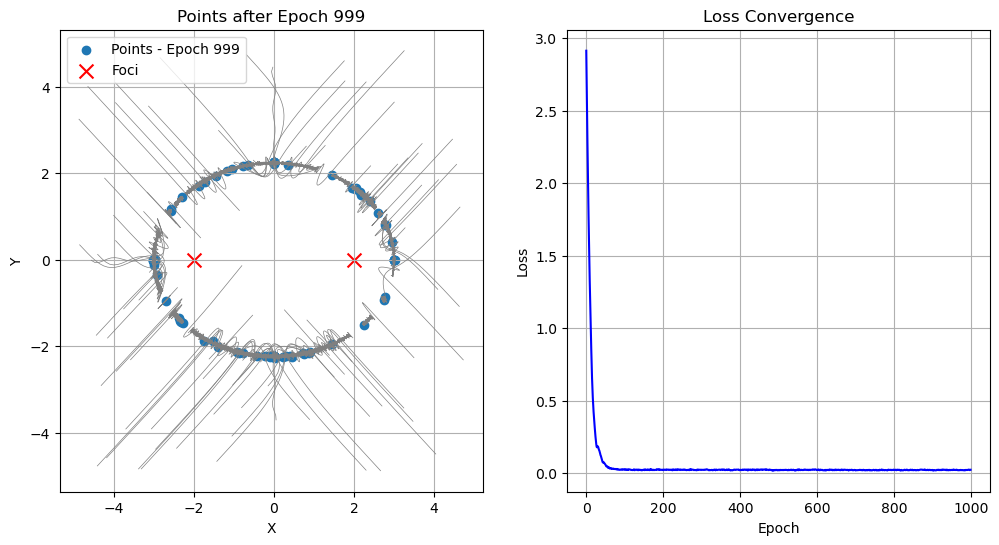

Elapsed time: 7.542003154754639 seconds


In [3]:
# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []

# Start timing
start_time = time.time()

# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    # Compute l_1 loss
    loss = torch.mean(torch.abs(dist1 + dist2 - constant_sum))

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if epoch % 100 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

#Final plot
plot_results(epoch, trajectories, loss_history)

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

For the loss function taking the form
$$
L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|
$$
the points form an ellipse very quickly, however, the loss does not converge to 0 as is the case for $\ell_2$ norm, but oscillates around 0.02.

The reason is that the derivative of absolute value function is -1 or +1, so the calculation of gradient does not take into account the fact that a point might already lie close to the ellipse. Because of that, even though the points already lie close to the ellipse, they are still moved considerably during the optimization step. For the $\ell_2$ norm the problem does not arise, because the derivative of square function is linear, so it is small for values close to 0.

## $\ell_{\infty}$ norm

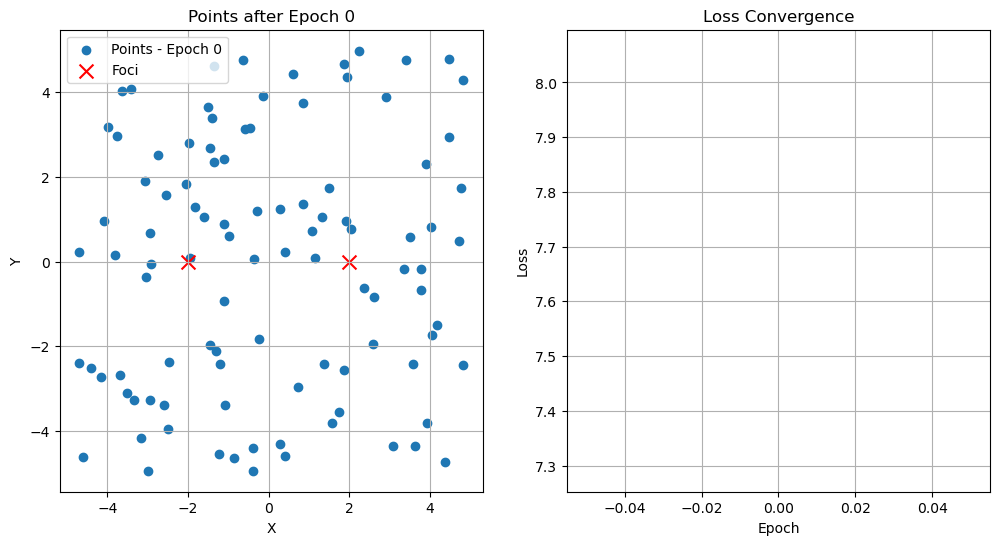

Epoch 0: Loss = 7.674280


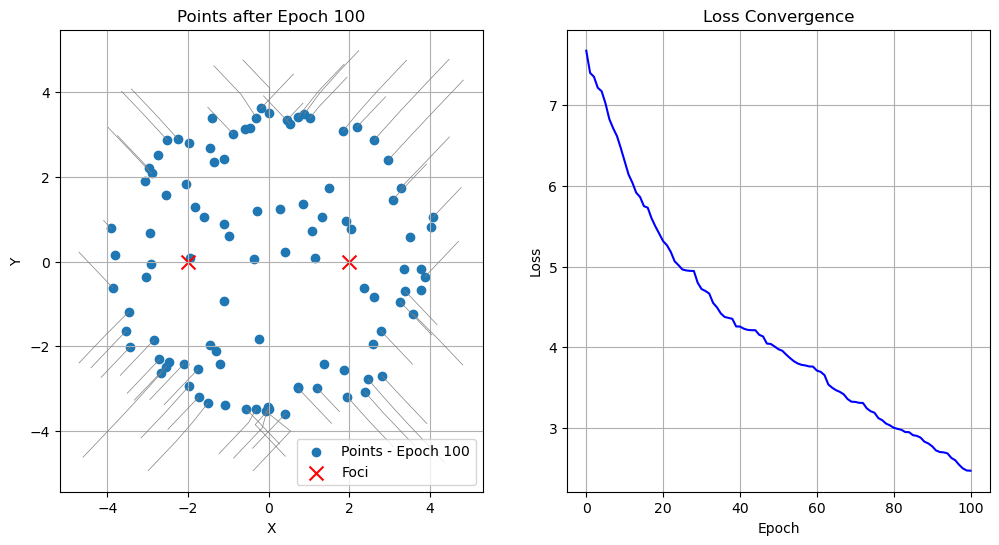

Epoch 100: Loss = 2.471096


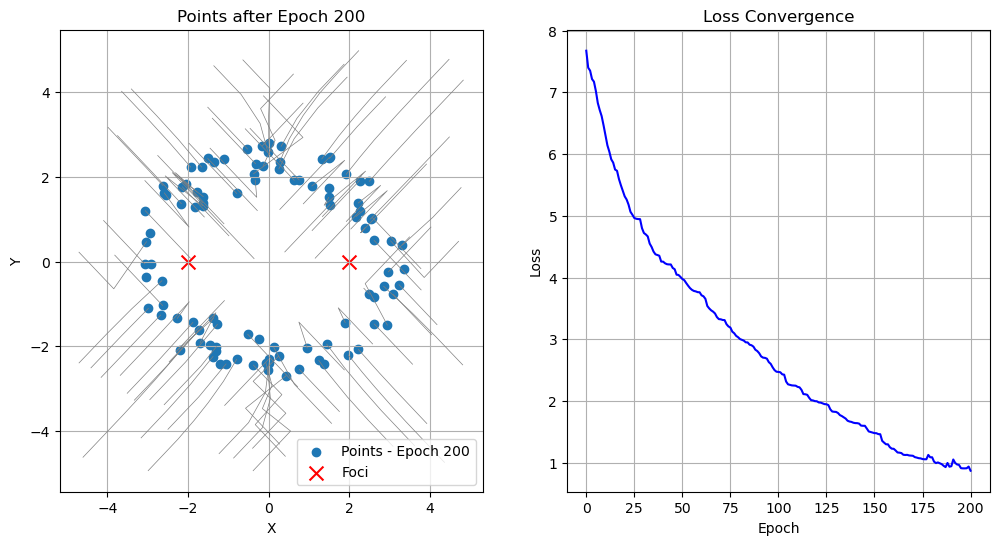

Epoch 200: Loss = 0.870482


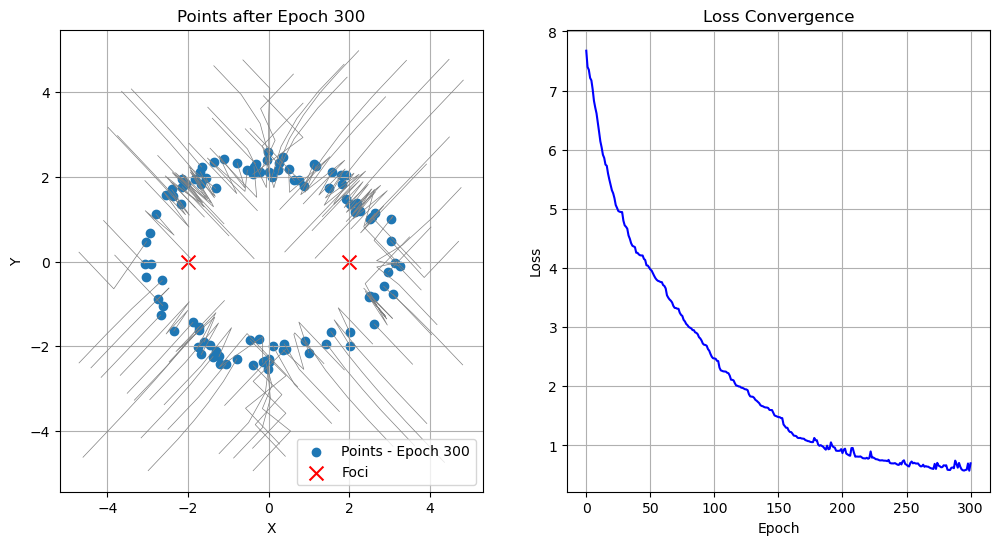

Epoch 300: Loss = 0.697989


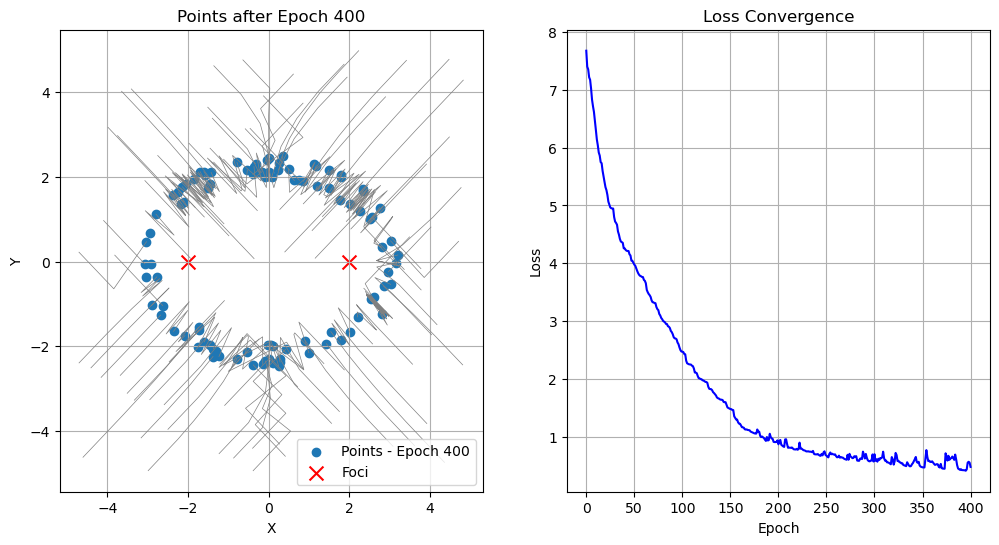

Epoch 400: Loss = 0.479144


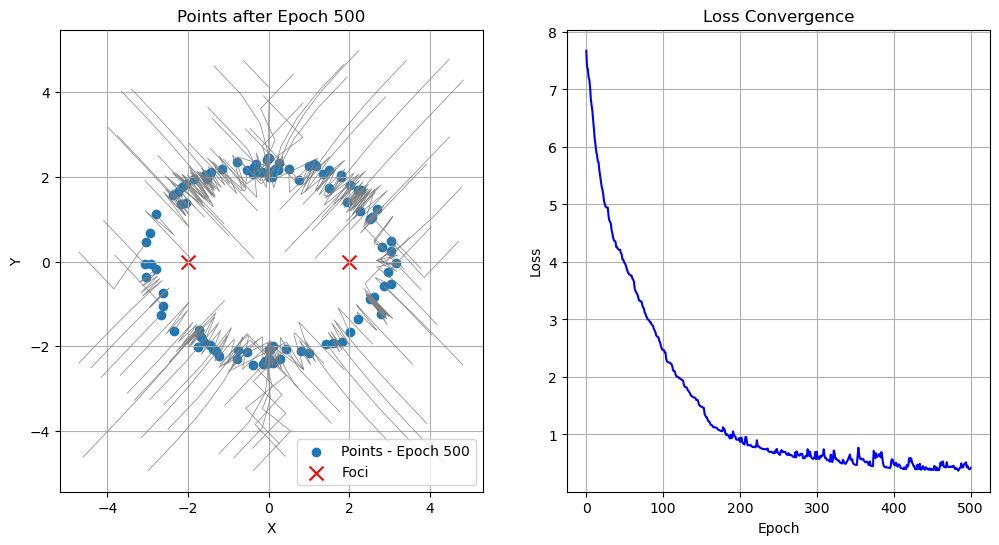

Epoch 500: Loss = 0.415124


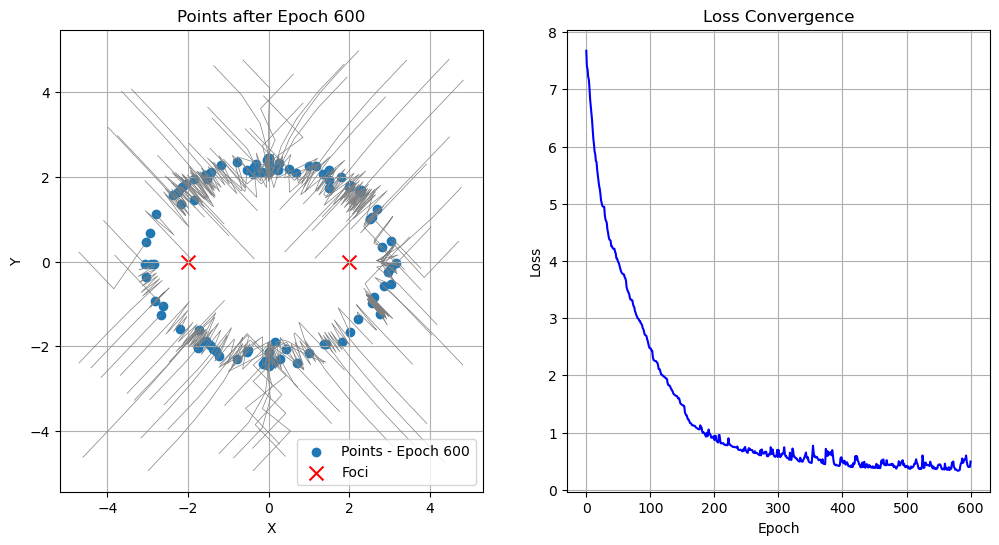

Epoch 600: Loss = 0.493013


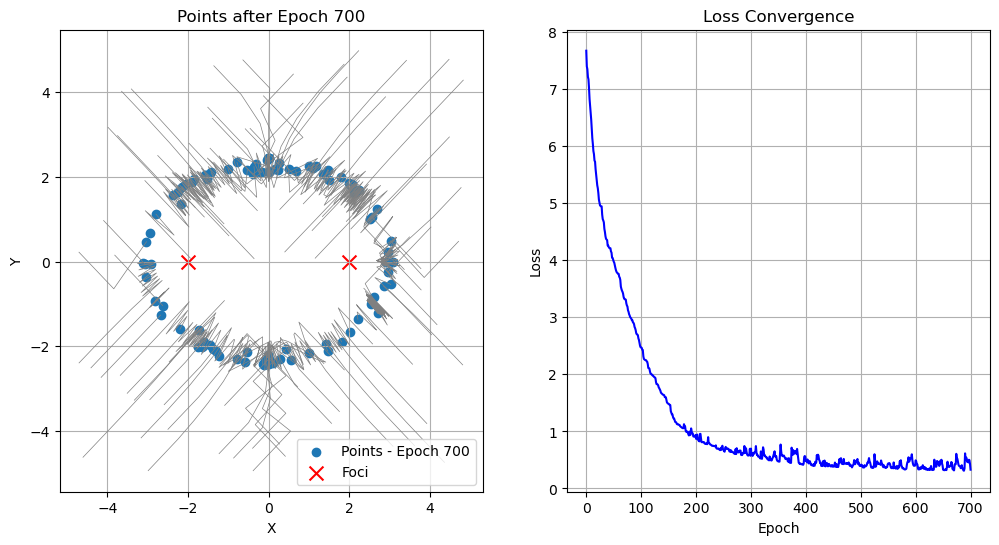

Epoch 700: Loss = 0.328804


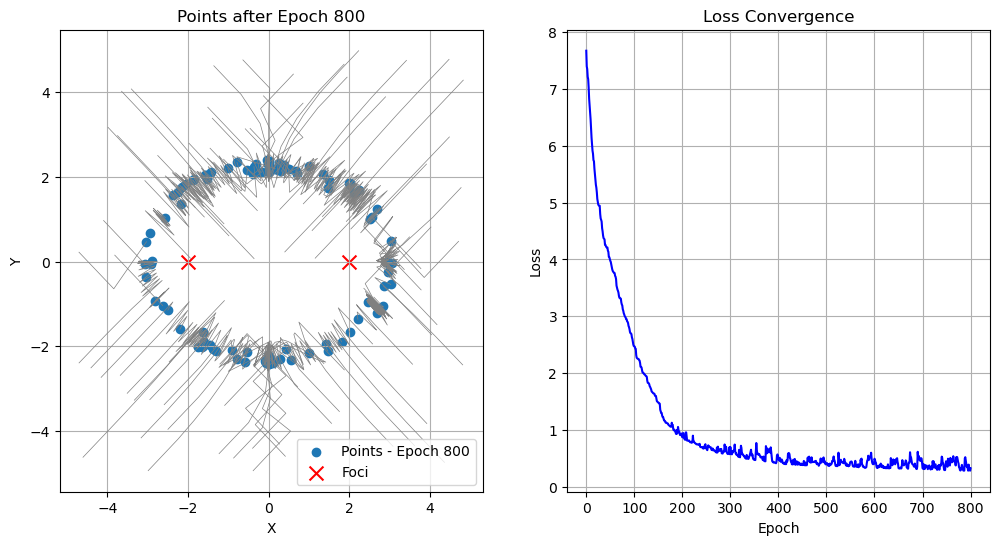

Epoch 800: Loss = 0.323367


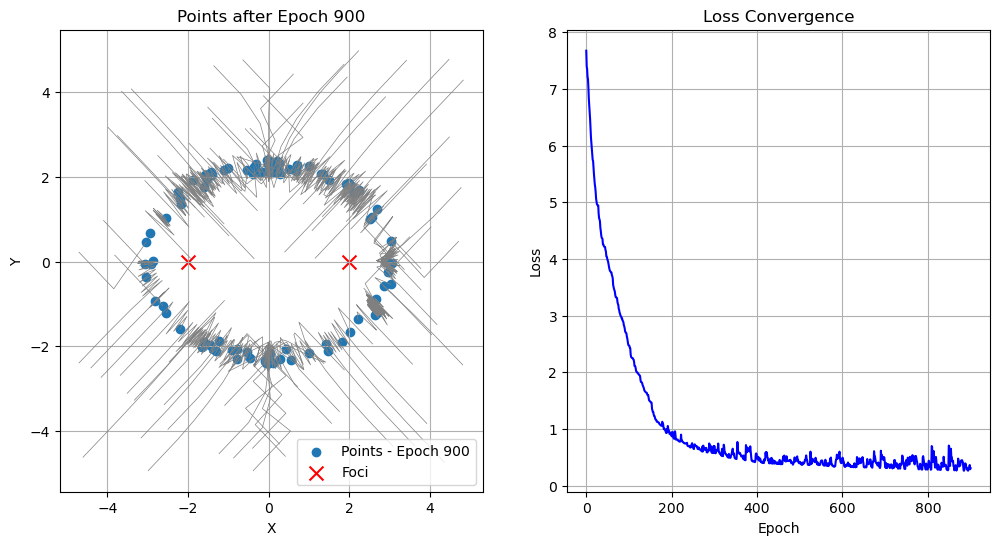

Epoch 900: Loss = 0.308894


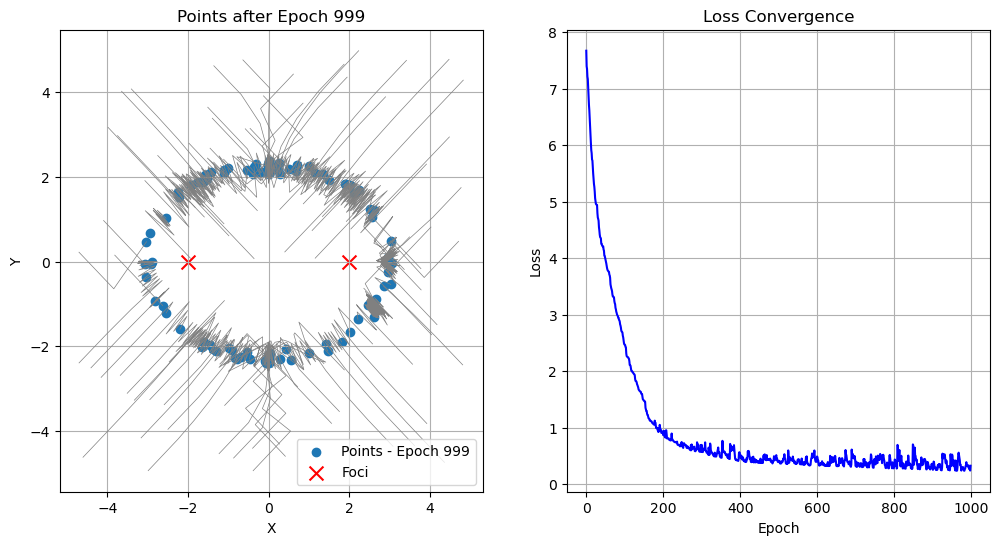

Elapsed time: 8.674528121948242 seconds


In [4]:
# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []

# Start timing
start_time = time.time()

# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)

    # Compute l_infty loss
    loss = torch.max(torch.abs(dist1 + dist2 - constant_sum))

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if epoch % 100 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

#Final plot
plot_results(epoch, trajectories, loss_history)

# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

For the loss function taking the form
$$
L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|
$$
the points eventually roughly form an ellipse but the process is much slower than for $\ell_1$ or $\ell_2$ norm, the ellipse shape is not as pronounced as in the $\ell_1$ and $\ell_2$ norms, and the loss also does not converge.

The reason the training is so slow in this case is that the loss function depends only on one observation, the worse one. As a result, the optimization step affects only one point at a time, which is wildly ineffective. In the end, the loss would not converge for the same reason it does not converge for the $\ell_1$ norm, the derivative of absolute value is equal to -1 or +1, so even for points lying close to the ellipse the optimization step is quite large.